In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

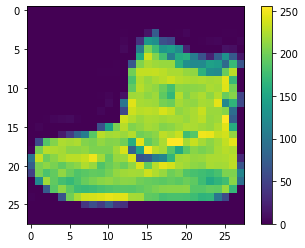

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

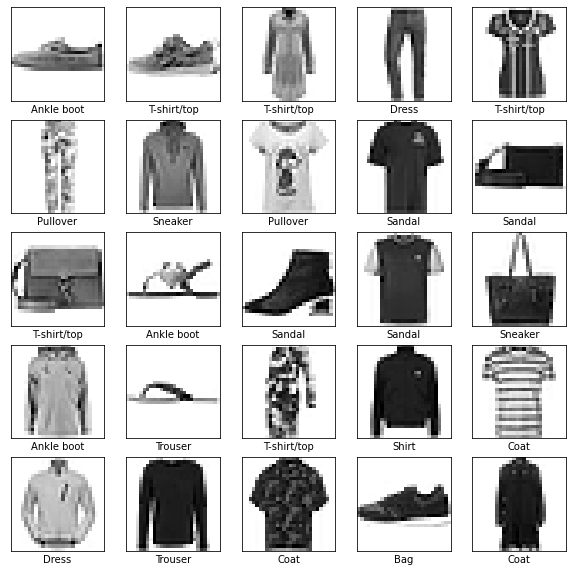

In [16]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+40000], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5020 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3403 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8911


In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3420 - accuracy: 0.8777

테스트 정확도: 0.8776999711990356


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([9.8231376e-06, 1.1224613e-07, 2.4332899e-06, 1.2559934e-07,
       7.3944949e-07, 1.4511532e-02, 6.0659700e-06, 4.1565038e-02,
       5.7381327e-05, 9.4384676e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

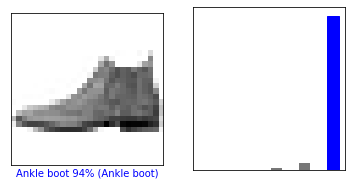

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

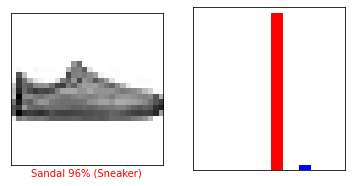

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

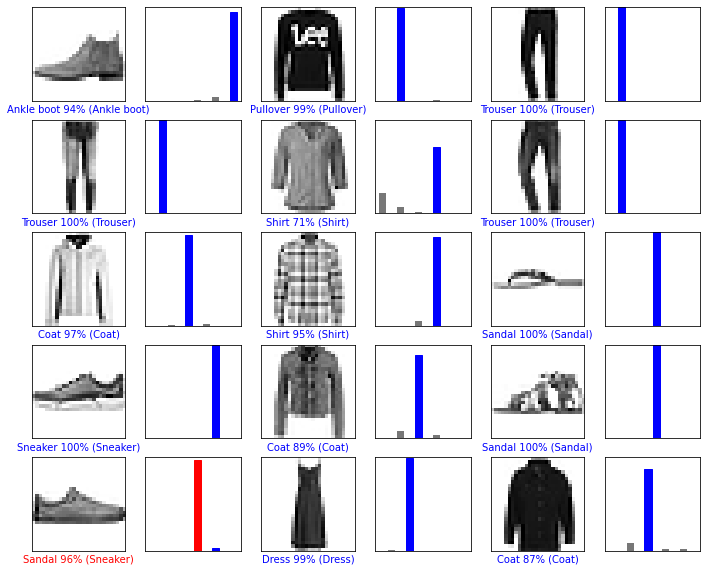

In [28]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [87]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [105]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [106]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.8334417e-07 3.5008767e-08 8.5162924e-08 2.7762586e-09 2.3677220e-09
  2.0124626e-13 1.4679043e-06 1.1667562e-13 9.9999821e-01 1.7120588e-12]]


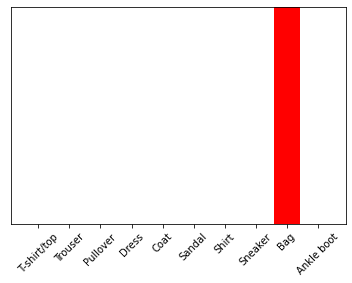

In [107]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [91]:
np.argmax(predictions_single[0])

9

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

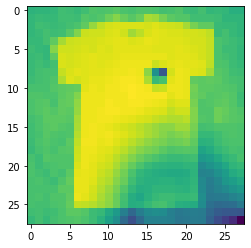

In [99]:
img = cv2.imread("/content/drive/MyDrive/tshirt.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(img)
plt.show()


In [100]:
img.shape

(28, 28)

In [101]:
img = img/255.

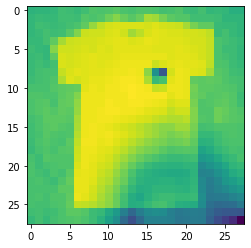

In [102]:
plt.imshow(img)
plt.show()

In [103]:
img.shape

(28, 28)

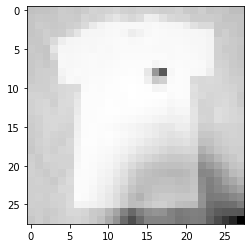

In [104]:
plt.imshow(img, cmap='Greys_r')
plt.show()

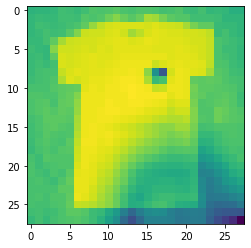

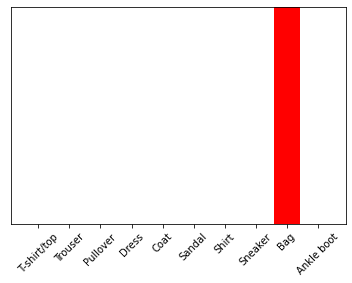

In [109]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
fname='tshirt.jpg'
img = cv2.imread('/content/drive/MyDrive/'+fname)
img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
img = img/255.
plt.imshow(img)
plt.show()
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)